In [1]:
using CSV, DataFrames, Plots, Statistics

In [2]:
include("C:\\Users\\arie\\OneDrive - University of Pittsburgh\\Bounds.jl\\src\\setBLP.jl")

Main.setBLP

In [3]:
using Main.setBLP

In [4]:
cps = DataFrame(CSV.File("c:\\data\\Bounds\\cps.csv")) # <-change this to the right directory

## Cleaning zero wage

cps = cps[cps.wage .> 0, :]
first(cps,5)

Row,age,wage,educ
,Int64,Int64,String
1,22,12000,some college but no degree
2,21,3500,some college but no degree
3,49,30000,some college but no degree
4,31,32000,bachelor's degree
5,42,89630,doctorate degree


In [5]:
# Numerical value for education

#1.Creating a dictionary

educ_dict = Dict( 
    "grade 11" => 11, 
    "some college but no degree" => 13, 
    "associate's degree, academic program" => 14,
    "grade 10" => 10, 
    "grades 7 or 8" => 8, 
    "grades 1, 2, 3, or 4" => 4, 
    "associate's degree, occupational/vocational program" => 14, 
    "high school diploma or equivalent" => 12, 
    "grade 9" => 9, 
    "none or preschool" => 0, 
    "doctorate degree" => 21,
    "bachelor's degree" => 16, 
    "master's degree" => 14, 
    "grades 5 or 6" => 6, 
    "professional school degree" => 14, 
    "12th grade, no diploma" => 12
    );

In [6]:
#2. transforming cps.educ
f(x) = educ_dict[x]
cps.educ_num = f.(cps.educ)

#3. log of wage
cps.log_wage = log.(cps.wage)
first(cps,3)

Row,age,wage,educ,educ_num,log_wage
,Int64,Int64,String,Int64,Float64
1,22,12000,some college but no degree,13,9.39266
2,21,3500,some college but no degree,13,8.16052
3,49,30000,some college but no degree,13,10.309


In [7]:
Nobs, c = size(cps)
print("The original data contains ", Nobs, " observations and ",c, " columns.")

The original data contains 22715 observations and 5 columns.

In [8]:
wage_quantiles = quantile(cps[!,:wage],[0.0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], sorted=false);
#wage_quantiles[1] +=-1
wage_quantiles[end] +=1

362303.0

In [9]:
lower(x) = wage_quantiles[sum(wage_quantiles .<=x)]
upper(x) = wage_quantiles[sum(wage_quantiles .<=x)+1]

cps.wage_lower = lower.(cps.wage)
cps.wage_upper = upper.(cps.wage)

cps.logwage_lower = log.(cps.wage_lower)
cps.logwage_upper = log.(cps.wage_upper)

first(cps,3)

Row,age,wage,educ,educ_num,log_wage,wage_lower,wage_upper,logwage_lower,logwage_upper
,Int64,Int64,String,Int64,Float64,Float64,Float64,Float64,Float64
1,22,12000,some college but no degree,13,9.39266,9000.0,15000.0,9.10498,9.61581
2,21,3500,some college but no degree,13,8.16052,1.0,9000.0,0.0,9.10498
3,49,30000,some college but no degree,13,10.309,30000.0,36000.0,10.309,10.4913


In [39]:
N = 200;
df = cps[1:N,:];

In [40]:
describe(df);

In [41]:
x = df[:,:age];
yl = df[:,:logwage_lower];
yu = df[:,:logwage_upper];
xyl = x.*yl;
xyu = x.*yu;

In [42]:
vl = Vertex([yl[1],xyl[1]])
vu = Vertex([yu[1],xyu[1]])
P = Polygon([vl,vu])
sortPolygon!(P)

for j = 2:N
    vl = Vertex([yl[j],xyl[j]])
    vu = Vertex([yu[j],xyu[j]])
    P0 = Polygon([vl,vu])
    sortPolygon!(P0)
    P +=P0
    sortPolygon!(P)
end

In [43]:
#avgP = lambdaPolygon(P,1/N);

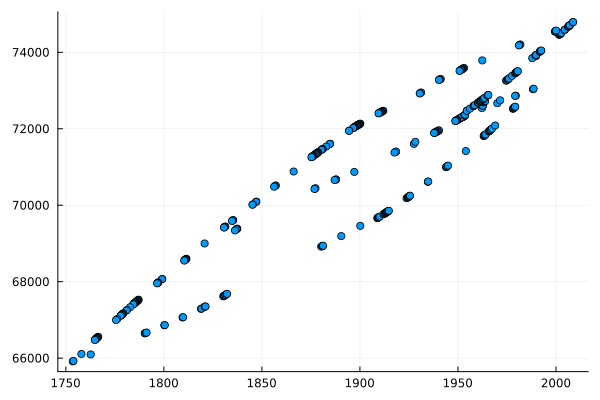

In [44]:
scatterPolygon(P)

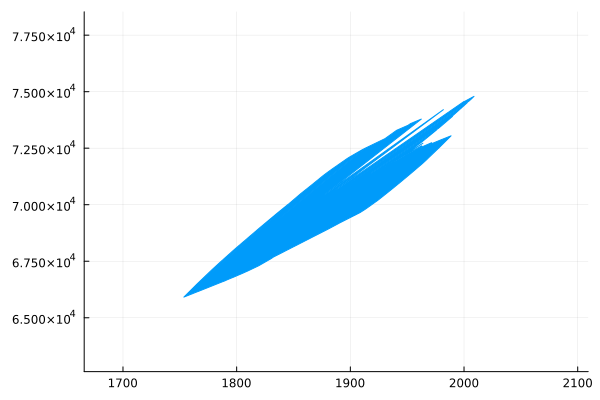

In [45]:
plotPolygon(P)

In [46]:
length(P.vertices)

356

In [18]:
for (i,v) in enumerate(P.vertices)
    println(i,": ",v)
end

1: Vertex(Real[3662.920449316371, 136442.14337687852])
2: Vertex(Real[3681.4180911014596, 136812.09621258028])
3: Vertex(Real[3710.6505137441227, 137424.4512824549])
4: Vertex(Real[3719.7554936004412, 137615.65585943757])
5: Vertex(Real[3728.86047345676, 137806.86043642025])
6: Vertex(Real[3729.044594319757, 137810.72697454318])
7: Vertex(Real[3729.3322763922088, 137816.76829806468])
8: Vertex(Real[3729.6199584646606, 137822.80962158614])
9: Vertex(Real[3730.1307840884265, 137833.53695968524])
10: Vertex(Real[3730.3539276397405, 137838.22297426284])
11: Vertex(Real[3730.8647532635064, 137849.4611379857])
12: Vertex(Real[3731.0878968148204, 137854.37029611462])
13: Vertex(Real[3731.3755788872722, 137860.69930170855])
14: Vertex(Real[3731.886404511038, 137871.9374654314])
15: Vertex(Real[3732.1095480623526, 137876.84662356033])
16: Vertex(Real[3741.214527918671, 138086.26116025564])
17: Vertex(Real[3741.725353542437, 138098.01014960225])
18: Vertex(Real[3741.948497093751, 138103.14245128

155: Vertex(Real[3935.3248033018244, 144666.70792196388])
156: Vertex(Real[4026.2565327510833, 147429.3835983716])
157: Vertex(Real[4017.151552894765, 147247.28400124525])
158: Vertex(Real[4016.640727270999, 147236.55666314616])
159: Vertex(Real[4007.5357474146804, 147027.14212645084])
160: Vertex(Real[4007.2480653422285, 147020.237756712])
161: Vertex(Real[4007.0249217909145, 147014.21288082653])
162: Vertex(Real[4006.8017782396005, 147008.18800494104])
163: Vertex(Real[4007.0941662030896, 147019.29874755364])
164: Vertex(Real[4007.276487759884, 147026.22696671178])
165: Vertex(Real[4007.683752174195, 147040.02394153146])
166: Vertex(Real[4007.460608622881, 147033.55277854335])
167: Vertex(Real[4007.971434246647, 147059.09405973164])
168: Vertex(Real[4007.460608622881, 147047.34507038502])
169: Vertex(Real[4007.237465071567, 147041.32019449954])
170: Vertex(Real[4006.949782999115, 147033.55277854332])
171: Vertex(Real[4006.726639447801, 147027.30475910654])
172: Vertex(Real[4007.13210

403: Vertex(Real[3991.359058695451, 148190.08206418846])
404: Vertex(Real[3969.361899639165, 147403.5361538717])
405: Vertex(Real[3991.541380252245, 148197.01028334664])
406: Vertex(Real[3991.9281532273408, 148211.7076564003])
407: Vertex(Real[3992.112274090338, 148218.70424919418])
408: Vertex(Real[3969.0742175667137, 147395.48105584306])
409: Vertex(Real[3992.6230997141042, 148238.62644852107])
410: Vertex(Real[3992.9154876775933, 148250.32196706065])
411: Vertex(Real[3993.097809234387, 148257.6148293324])
412: Vertex(Real[3968.786535494262, 147387.71363988688])
413: Vertex(Real[3968.604213937468, 147382.79095785343])
414: Vertex(Real[3993.608634858153, 148278.04785428304])
415: Vertex(Real[3993.79275572115, 148285.41268880293])
416: Vertex(Real[3968.3810703861536, 147376.98922551927])
417: Vertex(Real[3968.1579268348396, 147371.18749318508])
418: Vertex(Real[3995.422556722406, 148350.60472885316])
419: Vertex(Real[3995.6066775854033, 148358.15368423605])
420: Vertex(Real[3995.809329

648: Vertex(Real[3743.070005355531, 140188.54405489666])
649: Vertex(Real[3742.846861804217, 140178.94888219013])
650: Vertex(Real[3742.6442096921182, 140170.23484136988])
651: Vertex(Real[3742.4415575800194, 140161.52080054965])
652: Vertex(Real[3742.259236023225, 140153.13400893714])
653: Vertex(Real[3742.036092471911, 140142.8694055767])
654: Vertex(Real[3741.8537709151174, 140134.48261396415])
655: Vertex(Real[3689.4100758497784, 137691.47328451363])
656: Vertex(Real[3730.6424812310565, 139652.3971575495])
657: Vertex(Real[3730.4601596742627, 139644.3750090506])
658: Vertex(Real[3728.627706560908, 139563.74707206298])
659: Vertex(Real[3728.4435856979107, 139555.6457540911])
660: Vertex(Real[3728.240933585812, 139546.52640904664])
661: Vertex(Real[3728.0586120290177, 139538.32193899094])
662: Vertex(Real[3718.5686585038065, 139111.27403035644])
663: Vertex(Real[3718.345514952492, 139101.2325705473])
664: Vertex(Real[3717.940049844384, 139082.98664068244])
665: Vertex(Real[3717.75592